In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.metrics import confusion_matrix

# This loads the MNIST dataset
(train_images, train_labels_original), (test_images, test_labels_original) = mnist.load_data()

print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels_original.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels_original.shape}")

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


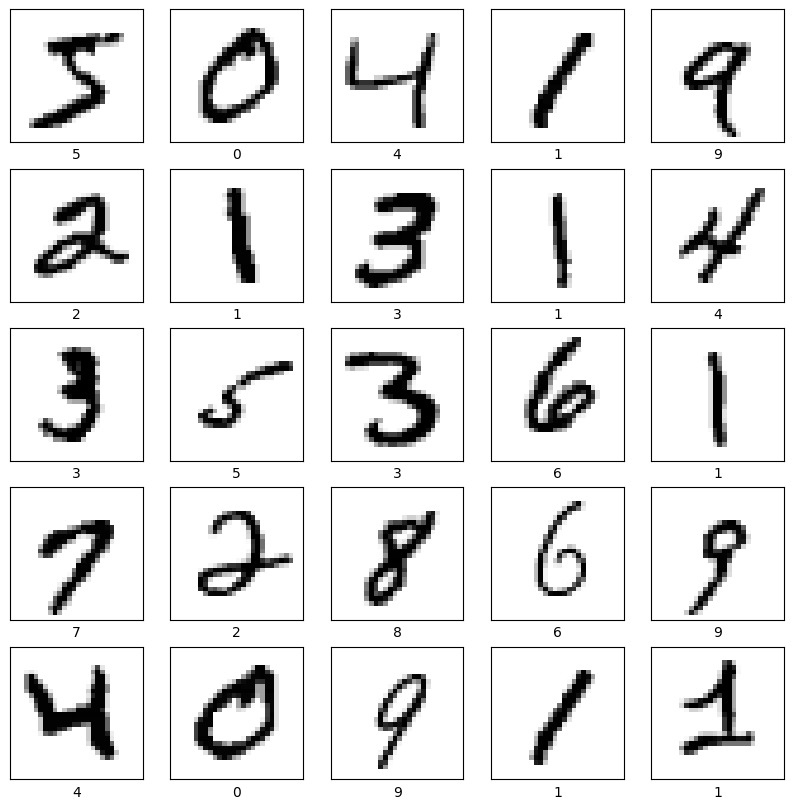

In [2]:
# Display the first few training images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels_original[i])
plt.show()

In [3]:
# Reshape images to include a channel dimension (for grayscale, it's 1)
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32')
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32')

# Normalize pixel values to be between 0 and 1
train_images /= 255
test_images /= 255

# One-hot encode the labels for training
train_labels_one_hot = to_categorical(train_labels_original)
test_labels_one_hot = to_categorical(test_labels_original) # This is what the model expects

print(f"Processed training images shape: {train_images.shape}")
print(f"Processed training labels shape: {train_labels_one_hot.shape}")

Processed training images shape: (60000, 28, 28, 1)
Processed training labels shape: (60000, 10)


In [4]:
model = Sequential([
    # First Convolutional Layer
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Second Convolutional Layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten the output for the Dense layers
    Flatten(),

    # Dense (Fully Connected) Layers
    Dense(64, activation='relu'),
    Dense(10, activation='softmax') # Output layer for 10 classes (digits 0-9)
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels_one_hot, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9411 - loss: 0.1973 - val_accuracy: 0.9823 - val_loss: 0.0622
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9819 - loss: 0.0593 - val_accuracy: 0.9897 - val_loss: 0.0421
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9870 - loss: 0.0420 - val_accuracy: 0.9887 - val_loss: 0.0394
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9900 - loss: 0.0314 - val_accuracy: 0.9887 - val_loss: 0.0410
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9922 - loss: 0.0244 - val_accuracy: 0.9885 - val_loss: 0.0399
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9933 - loss: 0.0199 - val_accuracy: 0.9920 - val_loss: 0.0334
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9948 - loss: 0.0157 - val_accuracy: 0.9892 - val_loss: 0.0419
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9953 - loss: 0.0139 - val_accuracy: 0.

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels_one_hot, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 - 0s - 1ms/step - accuracy: 0.9889 - loss: 0.0369

Test accuracy: 0.9889
Test loss: 0.0369


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step

Predictions for the first 10 test images:
True: 7, Predicted: 7
True: 2, Predicted: 2
True: 1, Predicted: 1
True: 0, Predicted: 0
True: 4, Predicted: 4
True: 1, Predicted: 1
True: 4, Predicted: 4
True: 9, Predicted: 9
True: 5, Predicted: 5
True: 9, Predicted: 9


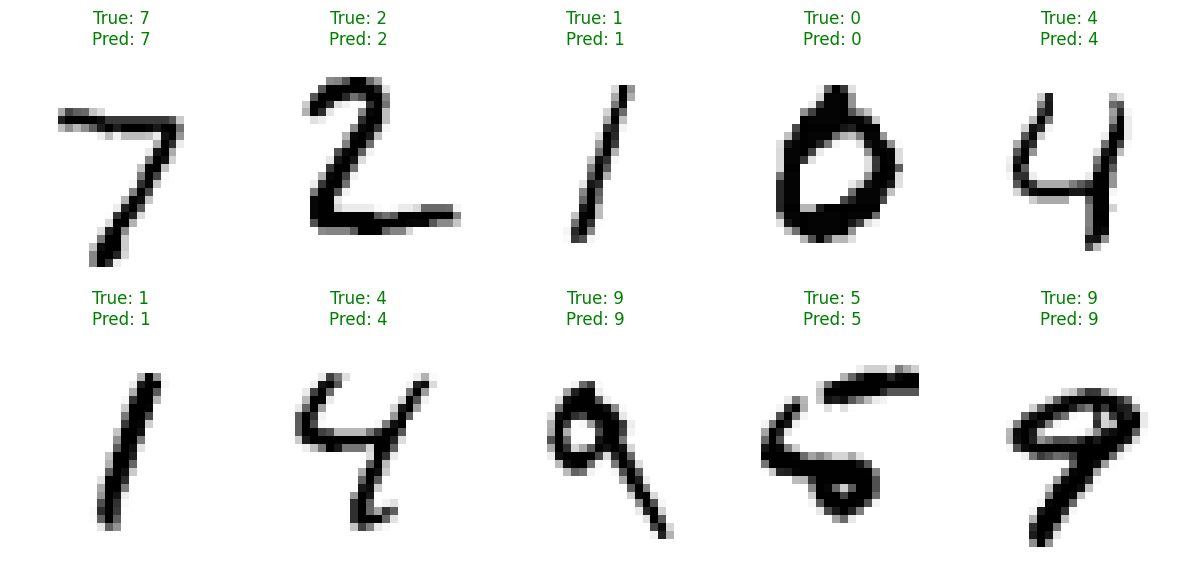

In [7]:
# Predict the probabilities of the first couple test images
predictions = model.predict(test_images[:10])

# Get the predicted digit (using index)
predicted_digits = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels_one_hot[:10], axis=1)

print("\nPredictions for the first 10 test images:")
for i in range(10):
    print(f"True: {true_labels[i]}, Predicted: {predicted_digits[i]}")

# Visualization to look at 
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(f"True: {true_labels[i]}\nPred: {predicted_digits[i]}",
              color="green" if true_labels[i] == predicted_digits[i] else "red")
    plt.axis('off')
plt.tight_layout()
plt.savefig('images/sample_predictions.png')
plt.show()

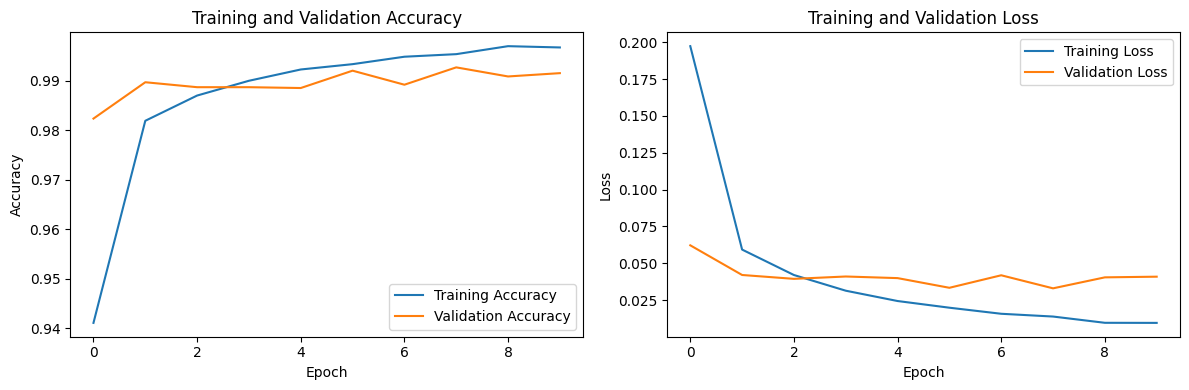

In [8]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig('images/training_history.png')
plt.show()

In [ ]:
y_pred_probs = model.predict(test_images)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = test_labels_original

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('images/confusion_matrix.png')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
